In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
print(f"Using CAMB {camb.__version__} installed at {camb.__file__}")

Using CAMB 1.6.1 installed at /home/joao/cosmo/CAMB-Monodromic/env/lib/python3.12/site-packages/camb/__init__.py


In [2]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = '1.0'
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linewidth'] = '0.0'
mpl.rcParams['grid.alpha'] = '0.18'
mpl.rcParams['grid.color'] = 'lightgray'
mpl.rcParams['legend.labelspacing'] = 0.77
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['font.size'] = 20

## Example 1: Figure 1 of https://arxiv.org/abs/2408.14628

In [ ]:
h = 0.6756
omegam = 0.27
omegabh2 = 0.02238280
omegab = omegabh2/h**2
omegac = omegam - omegab
omegach2 = omegac*h**2

cases = [
	{'alpha': 0.2 ,'A': 0.1, 'nu': 40},
    {'alpha': 0.0 ,'A': 0.1, 'nu': 40},
    {'alpha': -0.2 ,'A': 0.1, 'nu': 40},
    {'alpha': 0.2 ,'A': 0.1, 'nu': 40},
    {'alpha': 0.2 ,'A': 0.3, 'nu': 40},
    {'alpha': 0.2 ,'A': 0.5, 'nu': 40},
	{'alpha': 0.2 ,'A': 0.1, 'nu': 10},
	{'alpha': 0.2 ,'A': 0.1, 'nu': 20},
	{'alpha': 0.2 ,'A': 0.1, 'nu': 40},

]
results = []

for case in cases:
	cosmo = camb.set_params(# Background
		H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
		# Dark Energy
		dark_energy_model = 'MonodromicKEssence', alpha=case['alpha'], A=case['A'], nu=case['nu'],
		# Neutrinos
		omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
		nu_mass_degeneracies=[0], nu_mass_numbers = [0],
		# Initial Power Spectrum
		As = 2.100549e-09, ns = 0.9660499,
		YHe = 0.246, WantTransfer=True
	)
	results.append(camb.get_results(cosmo))

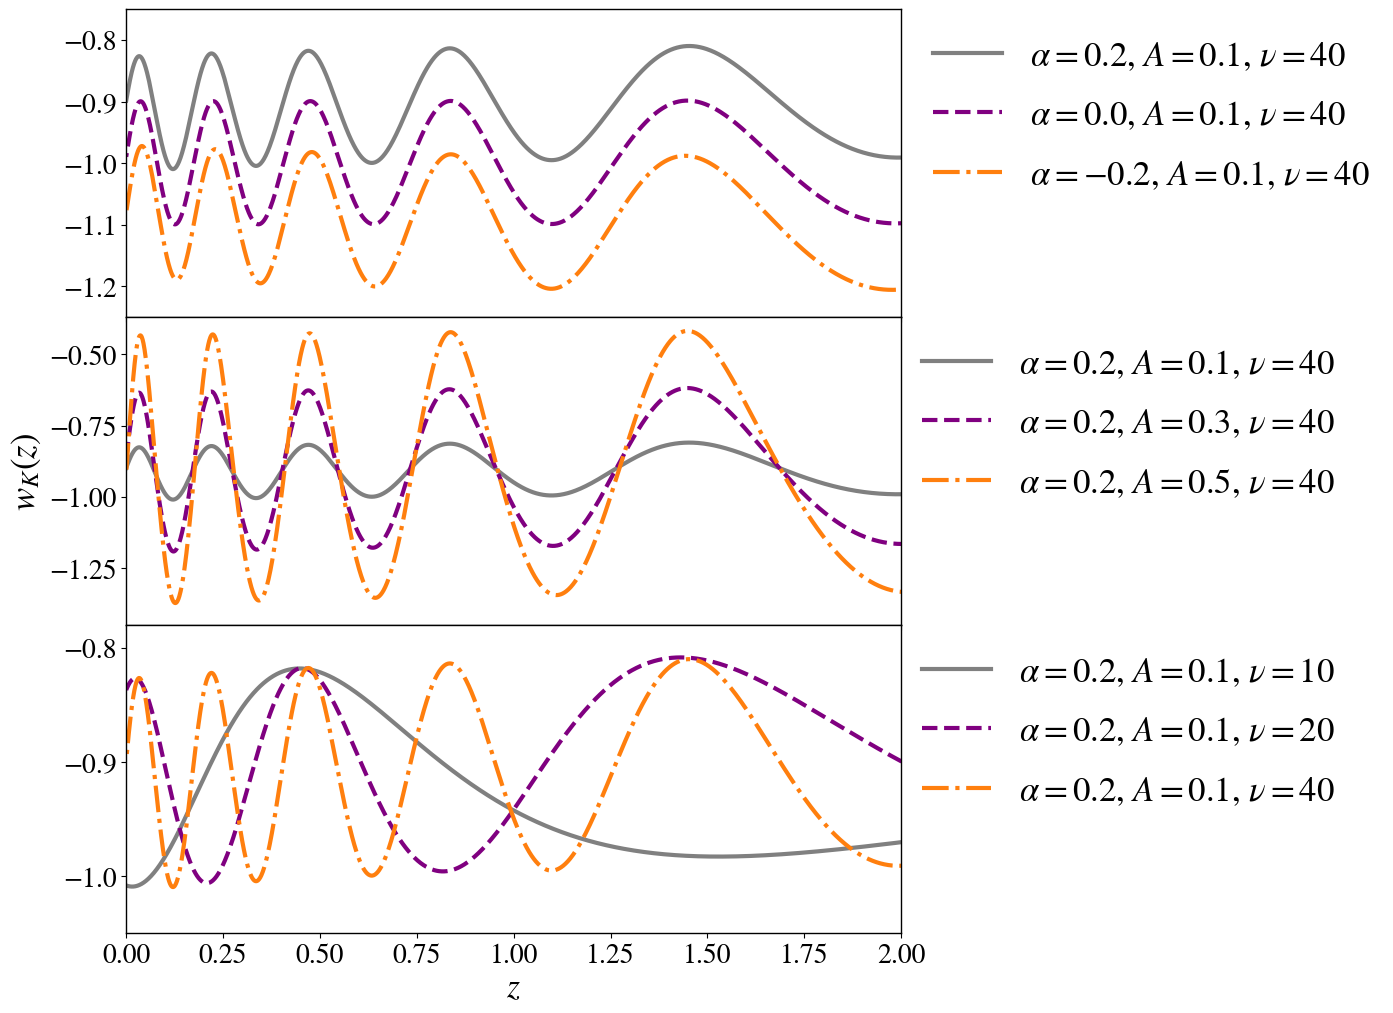

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,12), gridspec_kw={'hspace': 0})
scale_factor = np.logspace(-3, 0, 10000)
z = 1/scale_factor - 1
redshift = 1/scale_factor - 1
lws = [2, 2, 2]
lss = ['-', '--', '-.']
colors = ['gray', 'purple', 'tab:orange']
legend_labels = [fr"$\alpha = {case['alpha']}$, $A = {case['A']}$, $\nu = {case['nu']}$" if case['A'] != 0 else fr"$\alpha = {case['alpha']}$, $A = {case['A']}$" for case in cases]
for i, (case, result, label) in enumerate(zip(cases, results, legend_labels)):
    rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
    if i < 3:
        axs[0].plot(z, w_de, label=label, color=colors[i%3], ls=lss[i%3], lw=3)
    elif i < 6:
        axs[1].plot(z, w_de, label=label, color=colors[i%3], ls=lss[i%3], lw=3)
    else:
        axs[2].plot(z, w_de, label=label, color=colors[i%3], ls=lss[i%3], lw=3)

for i, ax in enumerate(axs):
    ax.legend(loc="upper right", fontsize=25, frameon=False, bbox_to_anchor=(1.645 if i == 0  else 1.6, 1))
plt.xlim([0, 2])
axs[0].set_ylim([-1.25, -0.75])
axs[1].set_ylim([-1.45, -0.37])
axs[2].set_ylim([-1.05, -0.78])
plt.xlabel(r"$z$")
axs[1].set_ylabel(r"$w_K(z)$", fontsize=25)
plt.savefig("kessence_cases2.pdf")

## Example 2: Figure 2 of https://arxiv.org/pdf/1709.01544

In [ ]:
h = 0.6756
omegam = 0.27
omegabh2 = 0.02238280
omegab = omegabh2/h**2
omegac = omegam - omegab
omegach2 = omegac*h**2

cases = [
	{'A': 0, 'nu': 0},
    {'A': 0.5, 'nu': 20},
    {'A': 0.3, 'nu': 50},
]
results = []

for case in cases:
	cosmo = camb.set_params(# Background
		H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
		# Dark Energy
		dark_energy_model = 'MonodromicKEssence', alpha=0.2, A=case['A'], nu=case['nu'],
		# Neutrinos
		omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
		nu_mass_degeneracies=[0], nu_mass_numbers = [0],
		# Initial Power Spectrum
		As = 2.100549e-09, ns = 0.9660499,
		YHe = 0.246, WantTransfer=True
	)
	results.append(camb.get_results(cosmo))

 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =    9.6707473520113316E-002
 C =    1.4456755077028907E-007 => omega_de =   0.25347119219886238     
 C =    4.1494940321373860E-007 => omega_de =   0.74095593520244685      (error =    1.5135558775992024E-002 )
 C =    4.0878733038063988E-007 => omega_de =   0.72969781299134384      (error =   -2.8846259771343334E-004 )
 C =    4.0890257448551164E-007 => omega_de =   0.72990830899649572      (error =   -7.5704973869519525E-008 )
 Finished shooting successfully after            3 iterations
 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =   0.10032897831760171     
 C =    1.4456755077028907E-007 => omega_de =   0.24908848693566465     
 C =    4.3211871892536077E-007 => omega_

4.0890257448551164e-07 0.7299029635479041
3.9838785554460127e-07 0.7288242820505603
4.052961966818426e-07 0.72822029967318


Text(0.5, 0, '$a$')

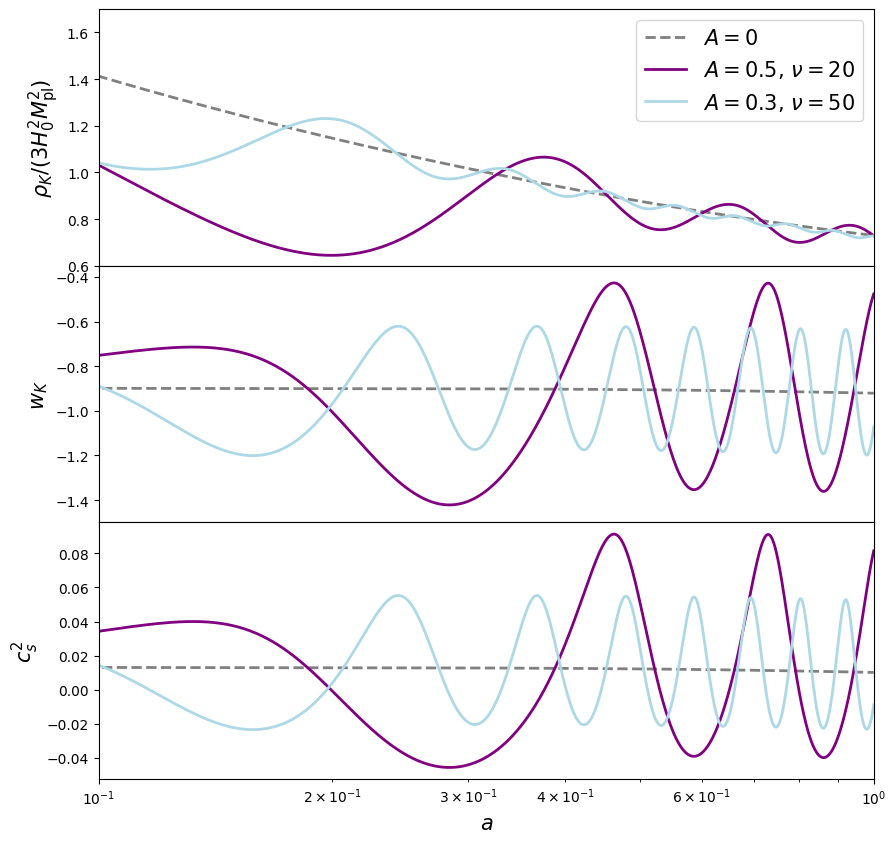

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,10), gridspec_kw={'hspace': 0})
scale_factor = np.logspace(-4, 0, 10000)
redshift = 1/scale_factor - 1
lws = [2, 2, 2]
lss = ['--', '-', '-']
colors = ['gray', 'purple', 'lightblue']
legend_labels = [fr"$A = {case['A']}$, $\nu = {case['nu']}$" if case['A'] != 0 else fr"$A = {case['A']}$" for case in cases]
for case, result, ls, lw, color, label in zip(cases, results, lss, lws, colors, legend_labels):
    rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
    print(result.Params.DarkEnergy.C, rho_de[-1]/result.grhocrit)
    aa = result.Params.DarkEnergy.sampled_a
    X = np.array(result.Params.DarkEnergy.X_a)
    cs2 = (1-2*X)/(1-6*X)
    axs[0].semilogx(scale_factor, rho_de/result.grhocrit, ls=ls, lw=lw, label=label, color=color)
    axs[1].semilogx(scale_factor, w_de, ls=ls, lw=lw, label=label, color=color)
    axs[2].semilogx(aa, cs2, ls=ls, lw=lw, label=label, color=color)

plt.xlim([0.1, 1])
axs[0].set_ylim([0.6, 1.7])
axs[1].set_ylim([-1.5, -0.35])
axs[0].legend(loc='upper right', fontsize=15)
axs[0].set_ylabel(r"$\rho_K/(3H_0^2M_\mathrm{pl}^2)$", fontsize=15)
axs[1].set_ylabel(r"$w_K$", fontsize=15)
axs[2].set_ylabel(r"$c_s^2$", fontsize=15)
axs[2].set_xlabel(r"$a$", fontsize=15)

## Example 3: Figure 1 of https://arxiv.org/pdf/2507.16970

In [10]:
h = 0.6756
omegam = 0.27
omegabh2 = 0.02238280
omegab = omegabh2/h**2
omegac = omegam - omegab
omegach2 = omegac*h**2

params = ["A", "alpha", "nu", "delta"]
centers = {
    "A": 0.5,
    "nu": 25,
    "alpha": 0,
    "delta": 0
}

spans = {
    "A"    : np.linspace(0, 0.7, 6),
    "nu"   : np.linspace(5, 35, 6),
    "alpha": np.linspace(-0.2, 0.2, 6),
    "delta": np.linspace(-np.pi, np.pi, 6)
}

results = {param: [] for param in params}

for param in params:
    for value in spans[param]:
        case = {param: value}
        for other in params:
            if other != param: case[other] = centers[other]
        cosmo = camb.set_params(# Background
            H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
            # Dark Energy
            dark_energy_model = 'MonodromicKEssence',
            alpha=case["alpha"], A=case['A'], nu=case['nu'], delta=case["delta"],
            # Neutrinos
            omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
            # Initial Power Spectrum
            As = 2.100549e-09, ns = 0.9660499,
            YHe = 0.246, WantTransfer=True
        )
        results[param].append(camb.get_results(cosmo))

cosmo_lcdm = camb.set_params(# Background
    H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
    # Neutrinos
    omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
    nu_mass_degeneracies=[0], nu_mass_numbers = [0],
    # Initial Power Spectrum
    As = 2.100549e-09, ns = 0.9660499,
    YHe = 0.246, WantTransfer=True
)
results_lcdm = camb.get_results(cosmo_lcdm)

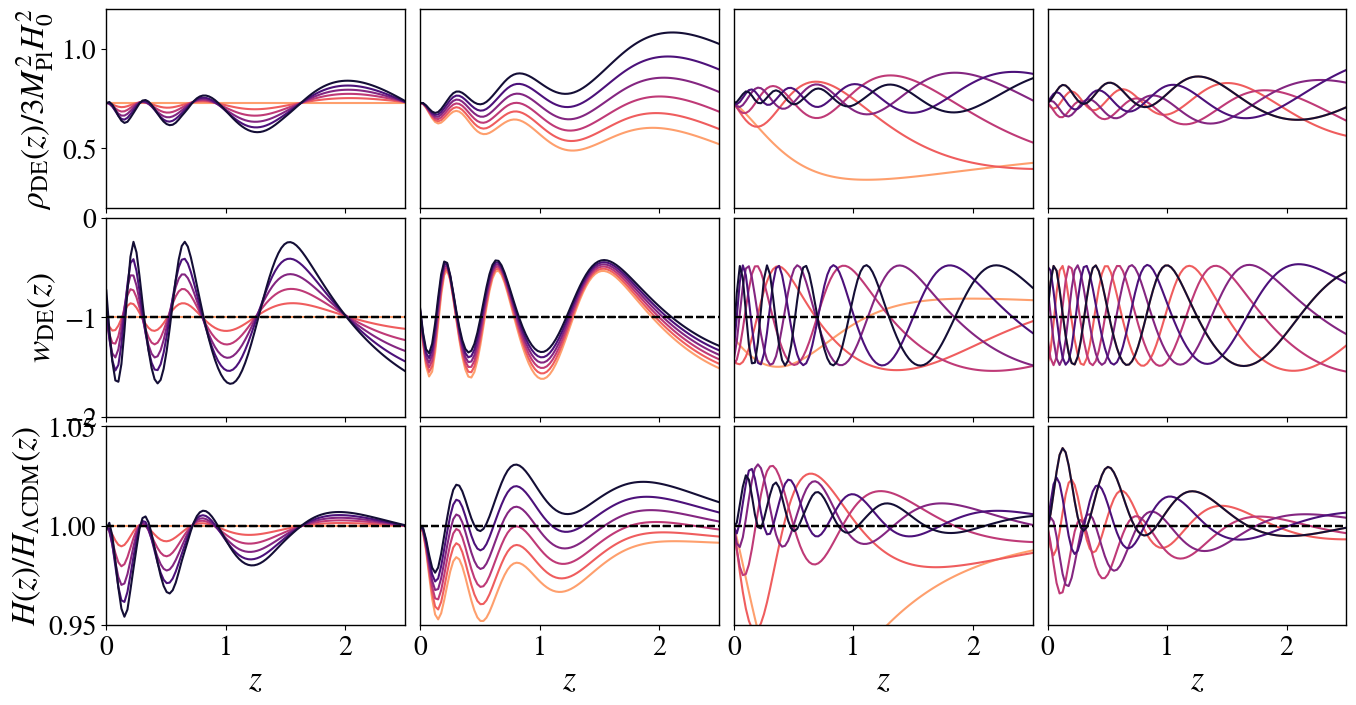

In [38]:
fig, axs = plt.subplots(3, 4, figsize=(16, 8), sharex=True, gridspec_kw={"hspace": 0.05, "wspace": 0.05})

z = np.linspace(0, 2.5, 100)
scale_factor = 1/(1 + z)
H_lcdm = results_lcdm.h_of_z(z)

cmap = mpl.colormaps["magma"]
colors = cmap(np.linspace(0.8, 0.1, 6))

for i, param in enumerate(params):
    results_for_param = results[param]
    for j, result in enumerate(results_for_param):
        rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
        H = result.h_of_z(z)
        axs[0, i].plot(z, rho_de/result.grhocrit, color=colors[j])
        axs[1, i].plot(z, w_de, color=colors[j])
        axs[2, i].plot(z, H/H_lcdm, color=colors[j])
        axs[0, i].set_ylim([0.2, 1.2])
        axs[1, i].set_ylim([-2, 0])
        axs[2, i].set_ylim([0.95, 1.05])

        axs[1, i].axhline(-1, color="black", ls="--")
        axs[2, i].axhline(1, color="black", ls="--")

for ax in axs.flatten():
    ax.set_xlim([z[0], z[-1]])
for row in range(3):
    for col in range(4):
        ax = axs[row, col]
        if col != 0:
            ax.set_yticks([])

axs[0, 0].set_ylabel(r"$\rho_\mathrm{DE}(z)/3M_\mathrm{Pl}^2H_0^2$")
axs[1, 0].set_ylabel(r"$w_\mathrm{DE}(z)$")
axs[2, 0].set_ylabel(r"$H(z)/H_{\Lambda\mathrm{CDM}}(z)$")
axs[2, 0].set_xlabel(r"$z$")
axs[2, 1].set_xlabel(r"$z$")
axs[2, 2].set_xlabel(r"$z$")
axs[2, 3].set_xlabel(r"$z$")
plt.savefig("fig1_2507_16970.pdf", bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
scale_factor = np.logspace(-4, 0, 10000)
redshift = 1/scale_factor - 1
lws = [2, 2, 2]
lss = ['--', '-', '-']
colors = ['gray', 'purple', 'lightblue']
legend_labels = [fr"$\alpha = {case['alpha']}, A = {case['A']}$, $\nu = {case['nu']}$" if case['A'] != 0 else fr"$\alpha = {case['alpha']}, A = {case['A']}$" for case in cases]
for case, result, label in zip(cases, results, legend_labels):
    rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
    print(result.Params.DarkEnergy.C, rho_de[-1]/result.grhocrit)
    aa = result.Params.DarkEnergy.sampled_a
    X = np.array(result.Params.DarkEnergy.X_a)
    cs2 = (1-2*X)/(1-6*X)
    ks = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
    pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2][0]
    c_ells = result.get_unlensed_scalar_cls()[:,0]
    axs[0].semilogx(c_ells[2:], label=label)
    axs[1].loglog(ks, pk, label=label)

axs[0].legend(loc='upper left', fontsize=15)
axs[0].set_xlabel(r"$\ell$", fontsize=15)
axs[0].set_ylabel(r"$C_\ell^\mathrm{TT}$", fontsize=15)
axs[1].set_xlabel(r"$k$", fontsize=15)
axs[1].set_ylabel(r"$P(k, z=0)$", fontsize=15)

 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =    7.5666028696458332E-002
 C =    1.4456755077028907E-007 => omega_de =   0.20890823931169977     
 C =    4.9243473035671673E-007 => omega_de =   0.86357443920810517      (error =   0.18312719993350673      )
 C =    4.1832764526150924E-007 => omega_de =   0.69853153642714216      (error =   -4.2987352061799745E-002 )
 C =    4.3241637740700848E-007 => omega_de =   0.69838592953609047      (error =   -4.3186838597620548E-002 )
 C =    4.4386950218246324E-007 => omega_de =   0.73262120718972923      (error =    3.7166897495575458E-003 )
 C =    4.4296194334939955E-007 => omega_de =   0.72960994113905475      (error =   -4.0885011016354212E-004 )
 C =    4.4305188443383809E-007 => omega_de =   0.72990833988610304      (error =   -3.3385130956065747E-008 )
 Finished shooting successfully after            6 i

4.430518844338381e-07 0.6867074356422013
4.090438224860324e-07 0.7276637971259018
4.052961966818426e-07 0.72822029967318


Text(0.5, 0, '$a$')

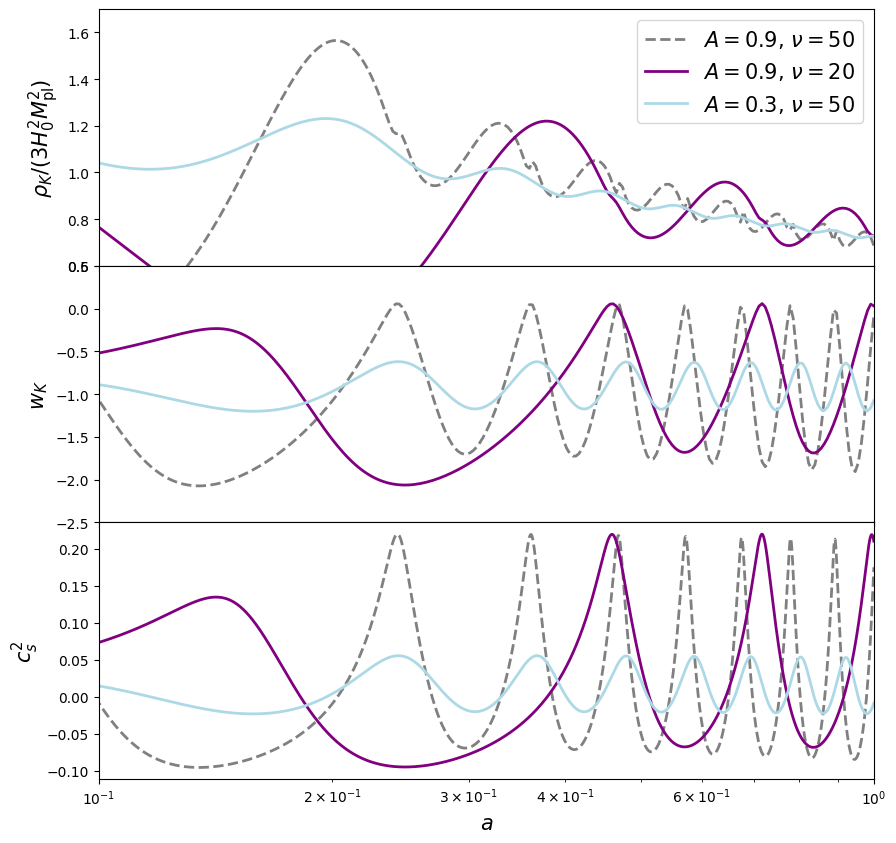

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,10), gridspec_kw={'hspace': 0})
scale_factor = np.logspace(-4, 0, 1000)
redshift = 1/scale_factor - 1
lws = [2, 2, 2]
lss = ['--', '-', '-']
colors = ['gray', 'purple', 'lightblue']
legend_labels = [fr"$A = {case['A']}$, $\nu = {case['nu']}$" if case['A'] != 0 else fr"$A = {case['A']}$" for case in cases]
for case, result, ls, lw, color, label in zip(cases, results, lss, lws, colors, legend_labels):
    rho_de, w_de = result.get_dark_energy_rho_w(scale_factor)
    print(result.Params.DarkEnergy.C, rho_de[-1]/result.grhocrit)
    aa = result.Params.DarkEnergy.sampled_a
    X = np.array(result.Params.DarkEnergy.X_a)
    cs2 = (1-2*X)/(1-6*X)
    axs[0].semilogx(scale_factor, rho_de/result.grhocrit, ls=ls, lw=lw, label=label, color=color)
    axs[1].semilogx(scale_factor, w_de, ls=ls, lw=lw, label=label, color=color)
    axs[2].semilogx(aa, cs2, ls=ls, lw=lw, label=label, color=color)

plt.xlim([0.1, 1])
axs[0].set_ylim([0.6, 1.7])
axs[1].set_ylim([-2.5, 0.5])
axs[0].legend(loc='upper right', fontsize=15)
axs[0].set_ylabel(r"$\rho_K/(3H_0^2M_\mathrm{pl}^2)$", fontsize=15)
axs[1].set_ylabel(r"$w_K$", fontsize=15)
axs[2].set_ylabel(r"$c_s^2$", fontsize=15)
axs[2].set_xlabel(r"$a$", fontsize=15)